In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
from IPython.display import clear_output

X= []
img_directories= []
for i in range(0, 1500):
    img_dir= "./pictures/" + str(i) + ".png"
    
    img= cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    if type(img) == np.ndarray:
        X.append(img)
        img_directories.append(img_dir)
    
clear_output()

X= np.array(X)

with open("./pictures/labels.csv") as f:
    l= f.read()
    try: # Mac
        int(l[1:2])
        l= l[1:]
    except: # Windows
        l= l[3:]
    
    labels= np.array(l.split(), dtype= int)
y= np.array(labels[0:X.shape[0]])

X_train, X_test, y_train, y_test, i_train, i_test= train_test_split(X, y, np.arange(y.size), test_size= .3, random_state= 10)

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=[50, 50, 1]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())


model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(1))

In [27]:
# Step 3: Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
model.compile(optimizer= "adam",
              loss= "MeanSquaredError",
              metrics= ["MeanAbsoluteError", "MeanSquaredError"])

# Step 4: Training
model.fit(X_train, y_train, epochs= 20, batch_size= 12)

# Step 5: Evaluation
test_loss, test_mae, test_mse= model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")


Epoch 1/20
40/40 [==============================] - 3s 28ms/step - loss: 905.6819 - mean_absolute_error: 21.6690 - mean_squared_error: 905.6819
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 883.4180 - mean_absolute_error: 21.2058 - mean_squared_error: 883.4180
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 698.5570 - mean_absolute_error: 19.3752 - mean_squared_error: 698.5570
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 655.5833 - mean_absolute_error: 17.9616 - mean_squared_error: 655.5833
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 1008.8778 - mean_absolute_error: 22.0771 - mean_squared_error: 1008.8778
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 786.6790 - mean_absolute_error: 20.0076 - mean_squared_error: 786.6790
Epoch 7/20
40/40 [==============================] - 1s 27ms/step - loss: 691.2604 - mean_absolute_error: 18.8863 - mean_squared_error:

7/7 [==============================] - 0s 11ms/step


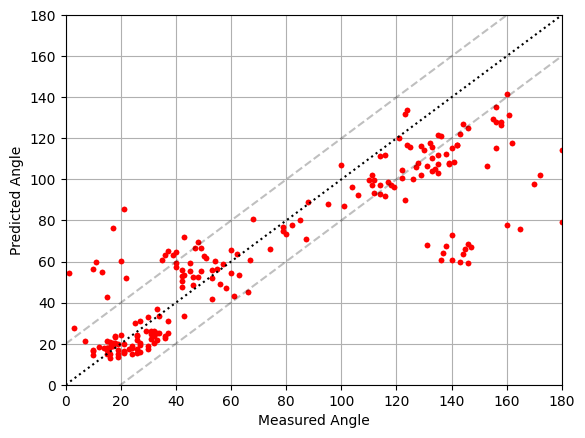

In [26]:
y_pred= model.predict(X_test)

plt.plot(y_test, y_pred, "r .")

plt.plot(y_test, y_pred, "r.")
plt.plot(np.arange(0, 180), np.arange(0, 180), "k:")
plt.plot(np.arange(0, 180), np.arange(0, 180)-test_mae, "k--", alpha= .25)
plt.plot(np.arange(0, 180), np.arange(0, 180)+test_mae, "k--", alpha= .25)

plt.xlabel("Measured Angle")
plt.ylabel("Predicted Angle")
plt.axis([0, 180, 0, 180])
plt.grid()